In [40]:
import pandas as pd

In [41]:
data = pd.read_csv("data/wasteraw_2014.csv")

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
data.head()

,Unnamed: 0,Truck_ID,Collection_Date,Shift_ID,HQ_Code,Zone_Code,District_Code,Section_Code,Route_Code,Material_Type_Code,...,exception code,authorized name,authorized badge,entry name,entry badge,DumpDate,DumpTime,relaycheck,Bin_Number,Finish_Trucks
0,6403680,23W 009,2014-01-01,2,BCCHQ,BXBO,BXW02,BXW021,BXW021W2,24,...,,,0.0,,00000,2014-01-01 00:00:00,10.0,NaN,1,0.25
1,6403681,23W 009,2014-01-01,2,BCCHQ,BXBO,BXW02,BXW021,BXW021W2,24,...,,,0.0,,00000,2014-01-01 00:00:00,7.0,NaN,1,0.25
2,6403682,23W 009,2014-01-01,2,BCCHQ,BXBO,BXW02,BXW021,BXW021W2,24,...,,,0.0,,00000,2014-01-01 00:00:00,8.0,NaN,1,0.25
3,6403683,23W 009,2014-01-01,2,BCCHQ,BXBO,BXW02,BXW021,BXW021W2,24,...,,,0.0,,00000,2014-01-01 00:00:00,8.0,NaN,1,0.25
4,6403684,23W 101,2014-01-01,2,BCCHQ,MNBO,ME10,ME101,ME101W8,24,...,,,0.0,,00000,2014-01-01 00:00:00,11.0,NaN,1,0.25


In [43]:
data.District_Code.unique()

array(['BXW02 ', 'ME10  ', 'ME03  ', 'QNB   ', 'BKW10 ', 'MW04  ',
       'MW09  ', 'ME11  ', 'QW09  ', 'OTHCLN', 'ME05  ', 'BKN08 ',
       'BKE13 ', 'BKW12 ', 'BXW04 ', 'QW04  ', 'BKN01 ', 'BKN02 ',
       'BKN03 ', 'BKN04 ', 'BKN05 ', 'MW07  ', 'BKE16 ', 'BKE17 ',
       'MW01  ', 'MW02  ', 'BXE06 ', 'ME06  ', 'MW12  ', 'QW02  ',
       'SI02  ', 'BKW07 ', 'BKW06 ', 'ME08  ', 'BKE14 ', 'BKE15 ',
       'BKE18 ', 'BKW11 ', 'BXE09 ', 'BXE10 ', 'BXE11 ', 'BXE12 ',
       'BXW01 ', 'BXW03 ', 'BXW05 ', 'BXW07 ', 'QN07  ', 'QN08  ',
       'QN11  ', 'QS10  ', 'QS12  ', 'QS13  ', 'QS14  ', 'QW01  ',
       'QW03  ', 'QW05  ', 'QW06  ', 'SI01  ', 'SI03  ', 'BKE09 ',
       'BXW08 ', 'BXLC  ', 'QSLC  ', 'SILC  ', 'BKLC  ', 'QNLC  ',
       'FKA   ', 'MNLC  '], dtype=object)

In [44]:
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip() if type(x) is str else x
    return df.applymap(trim_strings)
data = trim_all_columns(data)

In [45]:
data.Tons_Collected.sum()

3679240.000000002

In [46]:
data.Material_Type_Code.unique()

array([24, 87,  1, 31, 33,  6, 25, 45, 27, 14, 38, 26, 29, 82, 48, 81, 46,
       78, 84, 80,  2, 41, 37, 39, 11, 28, 58, 54, 10, 12, 51, 32, 22, 65,
       86, 97, 98, 96, 61, 60,  4])

In [47]:
#Within DSNY, the code for refuse is 01.
#Within DSNY, the code for paper is 31.
#Within DSNY, the code for residential organics is 45.
#Within DSNY, the code for metal, glass, plastic (MGP) is 33.

In [48]:
data['year'] = pd.to_datetime (data.Collection_Date)
data['month'] = pd.to_datetime (data.Collection_Date)

In [49]:
#aggregate data
refuse = data.loc[data.Material_Type_Code == 1]
paper = data.loc[data.Material_Type_Code == 31]
mgp = data.loc[data.Material_Type_Code == 33]
organic = data.loc[data.Material_Type_Code == 45]

In [50]:
refuse.head()

,Unnamed: 0,Truck_ID,Collection_Date,Shift_ID,HQ_Code,Zone_Code,District_Code,Section_Code,Route_Code,Material_Type_Code,...,authorized badge,entry name,entry badge,DumpDate,DumpTime,relaycheck,Bin_Number,Finish_Trucks,year,month
29,6403709,25DC111,2014-01-01,2,OTHER,OTHCLN,OTHCLN,OTHCLN,OTHCLNW1,1,...,0.0,,00000,2014-01-06 00:00:00,16.0,NaN,1,1.0,2014-01-01,2014-01-01
32,6403712,9999999,2014-01-01,3,BCCHQ,BKNBO,BKN08,BKN083,BKN083W2,1,...,0.0,,00000,NaN,NaN,NaN,1,0.0,2014-01-01,2014-01-01
33,6403713,9999999,2014-01-01,3,BCCHQ,BKNBO,BKN08,BKN083,BKN083W3,1,...,0.0,,00000,NaN,NaN,NaN,1,0.0,2014-01-01,2014-01-01
34,6403714,9999999,2014-01-01,3,BCCHQ,BKNBO,BKN08,BKN083,BKN083W4,1,...,0.0,,00000,NaN,NaN,NaN,1,0.0,2014-01-01,2014-01-01
35,6403715,9999999,2014-01-01,3,BCCHQ,BKSBO,BKE13,BKE132,BKE132W1,1,...,11.0,000 00000 00000,0000,NaN,NaN,NaN,1,0.0,2014-01-01,2014-01-01


# refuse

In [51]:
refuse.shape

(318482, 45)

In [52]:
refuse_vis = refuse.groupby([refuse.month.dt.month,refuse.year.dt.day  ]).sum()

In [53]:
refuse_vis=refuse_vis.reset_index()

<Figure size 432x288 with 0 Axes>

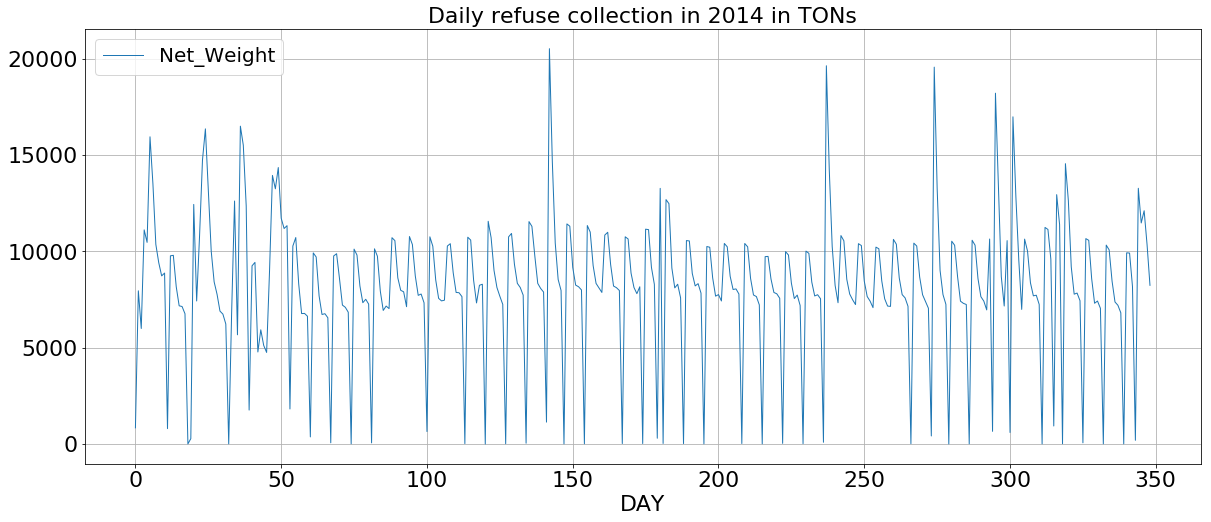

In [54]:

import matplotlib.pyplot as plt
plt.figure();
refuse_vis.plot( y='Net_Weight', linewidth=1, fontsize= 22,
                     figsize=(20,8), grid=True, x_compat=True)
plt.xlabel('DAY', fontsize=22)
plt.title('Daily refuse collection in 2014 in TONs',  fontsize=22)
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [56]:
refuse_district_wise = refuse.groupby([refuse.District_Code,refuse.year.dt.year ]).sum()

In [57]:
refuse_district_wise = refuse_district_wise.reset_index()

In [58]:
refuse2014= refuse_district_wise[['District_Code', 'Net_Weight']].copy()

In [59]:
refuse2014.to_csv("refuse_2014.csv")

In [60]:
refuse2014.Net_Weight.sum()

2858244.4399999985

# paper

In [61]:
paper_district_wise = paper.groupby([paper.District_Code,paper.year.dt.year ]).sum()

In [62]:
paper_district_wise = paper_district_wise.reset_index()

In [63]:
paper2014= paper_district_wise[['District_Code', 'Net_Weight']]

In [64]:
paper2014.to_csv("paper_2014.csv")

# glass/metal/plastic

In [66]:
gmp_district_wise = mgp.groupby([mgp.District_Code,mgp.year.dt.year ]).sum()

In [67]:
gmp_district_wise = gmp_district_wise.reset_index()

In [68]:
gmp2014= gmp_district_wise[['District_Code', 'Net_Weight']]

In [69]:
gmp2014.to_csv("glass_metal_plastic_2014.csv")